In [2]:
from scipy.io import wavfile
import numpy as np
from scipy import signal
import cv2
import matplotlib.pyplot as plt


np.set_printoptions(precision=3,edgeitems=5,suppress=True,linewidth=50)

In [3]:
rate, audio = wavfile.read('BigShip.wav')

audio = np.mean(audio, axis=1)

M = 1024

print("creating spectrogram")
freqs, times, spectro = signal.spectrogram(audio, fs=rate, window='hanning',nperseg=1024, noverlap=M - 100,detrend=False, scaling='spectrum')
print("made spectrogram")

print("len(freqs)",len(freqs))
print("len(times)",len(times))

# spectro = np.swapaxes(spectro,0,1)
print(spectro.shape)

creating spectrogram


made spectrogram
len(freqs) 513
len(times) 80811
(513, 80811)


In [4]:
from sklearn import preprocessing

print(spectro)

spectro = np.log10(spectro + 1)

print(spectro)

spectro = (spectro - np.min(spectro))/np.ptp(spectro)

# xmax, xmin = spectro.max(), spectro.min()
# spectro = (spectro - xmin)/(xmax - xmin)

print(spectro)

# spectro = np.log10(spectro)

print(spectro)

[[0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]]


[[0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]]


[[0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]]


In [5]:

#Cast entire numpy array to float in range 0-1
# spectro = spectro.astype(np.float64) / (spectro.max())

#scale by 255 for uint8
spectro = 255 * spectro

print(spectro)

spectro = spectro.astype(np.uint8)



[[0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0.]]


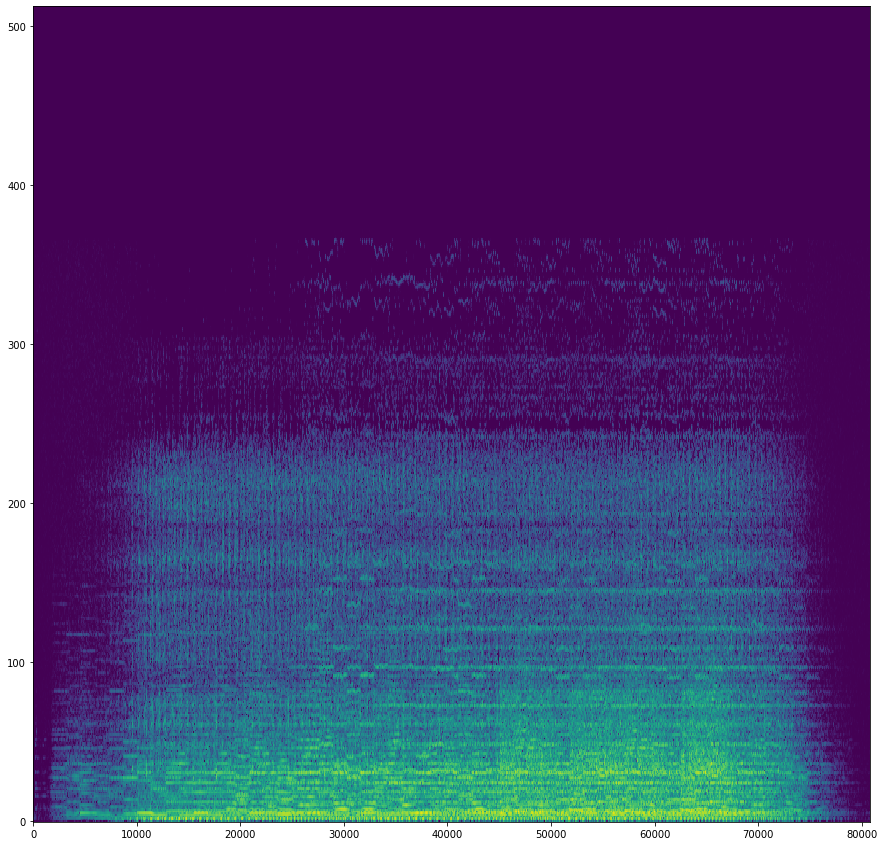

In [6]:
f, ax = plt.subplots(figsize=(15, 15))
plt.imshow(spectro ,aspect='auto')
ax.invert_yaxis()
plt.show()


Running threshold function


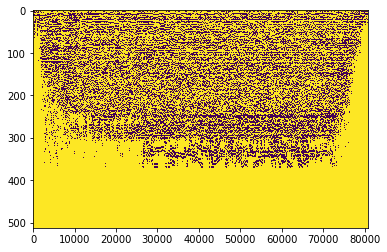

In [7]:
print("Running threshold function")

# spectro = spectro.astype(np.uint8)
thresh = cv2.adaptiveThreshold(spectro,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)

# blur = cv2.GaussianBlur(spectro,(5,5),0)
# ret,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

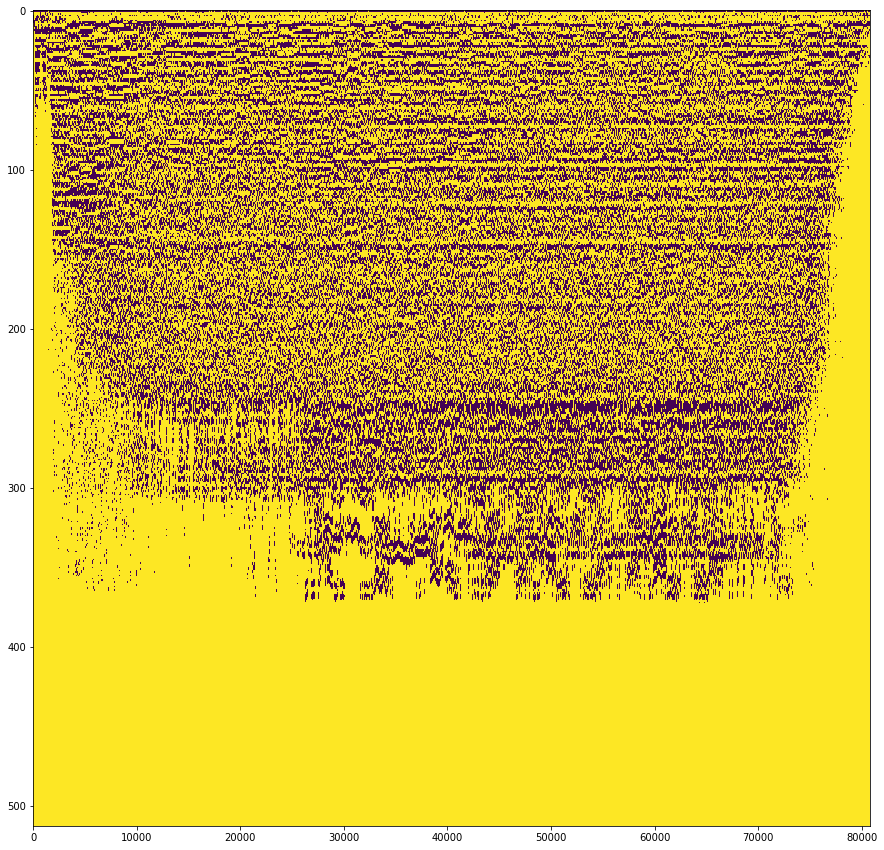

In [8]:
f, ax = plt.subplots(figsize=(15, 15))
plt.imshow(thresh ,aspect='auto')
ax.invert_yaxis()
plt.show()


In [9]:
# print("Running denoising function")
# spectro = cv2.fastNlMeansDenoising(spectro,None,7,21)
# plt.imshow(spectro ,aspect='auto')
# plt.show()

In [14]:
print("Running cv2.findcontours")
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,\
                                        cv2.CHAIN_APPROX_NONE)


Running cv2.findcontours


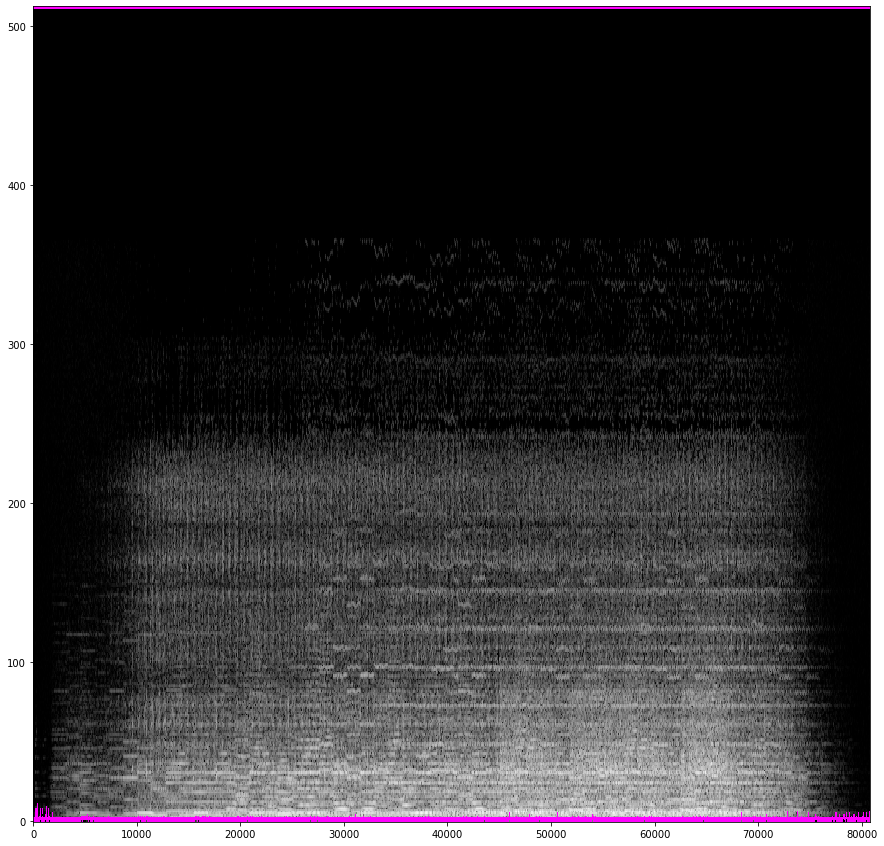

In [15]:
grey_spectro = cv2.cvtColor(spectro, cv2.COLOR_GRAY2BGR)

img = cv2.drawContours(grey_spectro, contours, -1, (255,0,255), 2)

f, ax = plt.subplots(figsize=(15, 15))
plt.imshow(img,aspect='auto')
ax.invert_yaxis()
plt.show()